In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
import os
print(os.getcwd())


/Users/carki/Desktop/Dev/codeit/DeepLearning(DL)/이미지와_컴퓨터_비전/[실습]


In [23]:
from pathlib import Path

# 공통 이미지 폴더 경로
image_dir = (Path.cwd().parents[2] / 'common' / 'image').resolve()

# 개별 이미지 경로
pepe_path = image_dir / 'pepe.png'
ddung_path = image_dir / 'ddung.png'


In [24]:
# 필터 정의
horizontal_filter = np.array(
    [
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ]
)

vertical_filter = np.array(
    [
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ]
)

diagonal_filter = np.array(
    [
        [-1, -1, 0],
        [-1, 0, 1],
        [0, 1, 1]
    ]
)

In [25]:
# 이미지 열기
image = Image.open(pepe_path).convert('L')
image_array = np.array(image)

# Convolution 연산 함수
def apply_filter(image, kernel):
    # 결과 저장을 위한 배열 초기화
    filtered_image = np.zeros_like(image)
    height, width = image.shape
    k = kernel.shape[0] // 2  # 필터의 중심 계산 (예: 3x3 필터 -> 1)

    for i in range(k, height - k):
        for j in range(k, width - k):
            region = image[i - k:i + k + 1, j - k:j + k + 1]
            filtered_value = np.sum(region * kernel)
            filtered_image[i, j] = min(max(filtered_value, 0), 255)  # 값 클리핑 (0~255)

    return filtered_image

# 필터 적용
horizontal_edges = apply_filter(image_array, horizontal_filter)
vertical_edges = apply_filter(image_array, vertical_filter)
diagonal_edges = apply_filter(image_array, diagonal_filter)

# 시각화

(np.float64(-0.5), np.float64(859.5), np.float64(458.5), np.float64(-0.5))

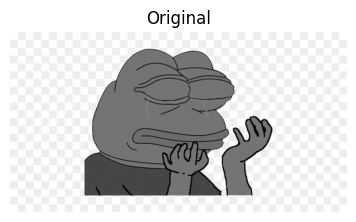

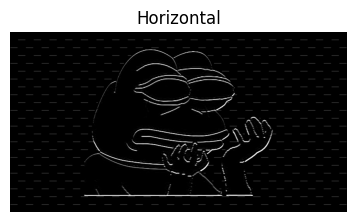

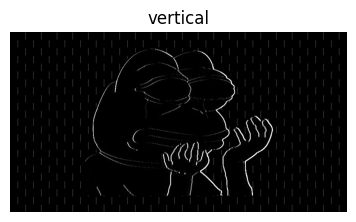

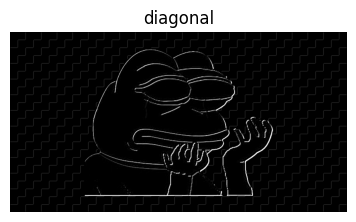

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 2)
plt.title('Horizontal')
plt.imshow(horizontal_edges, cmap='gray')
plt.axis('off')

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 3)
plt.title('vertical')
plt.imshow(vertical_edges, cmap='gray')
plt.axis('off')

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 3)
plt.title('diagonal')
plt.imshow(diagonal_edges, cmap='gray')
plt.axis('off')

libpng warning: iCCP: known incorrect sRGB profile


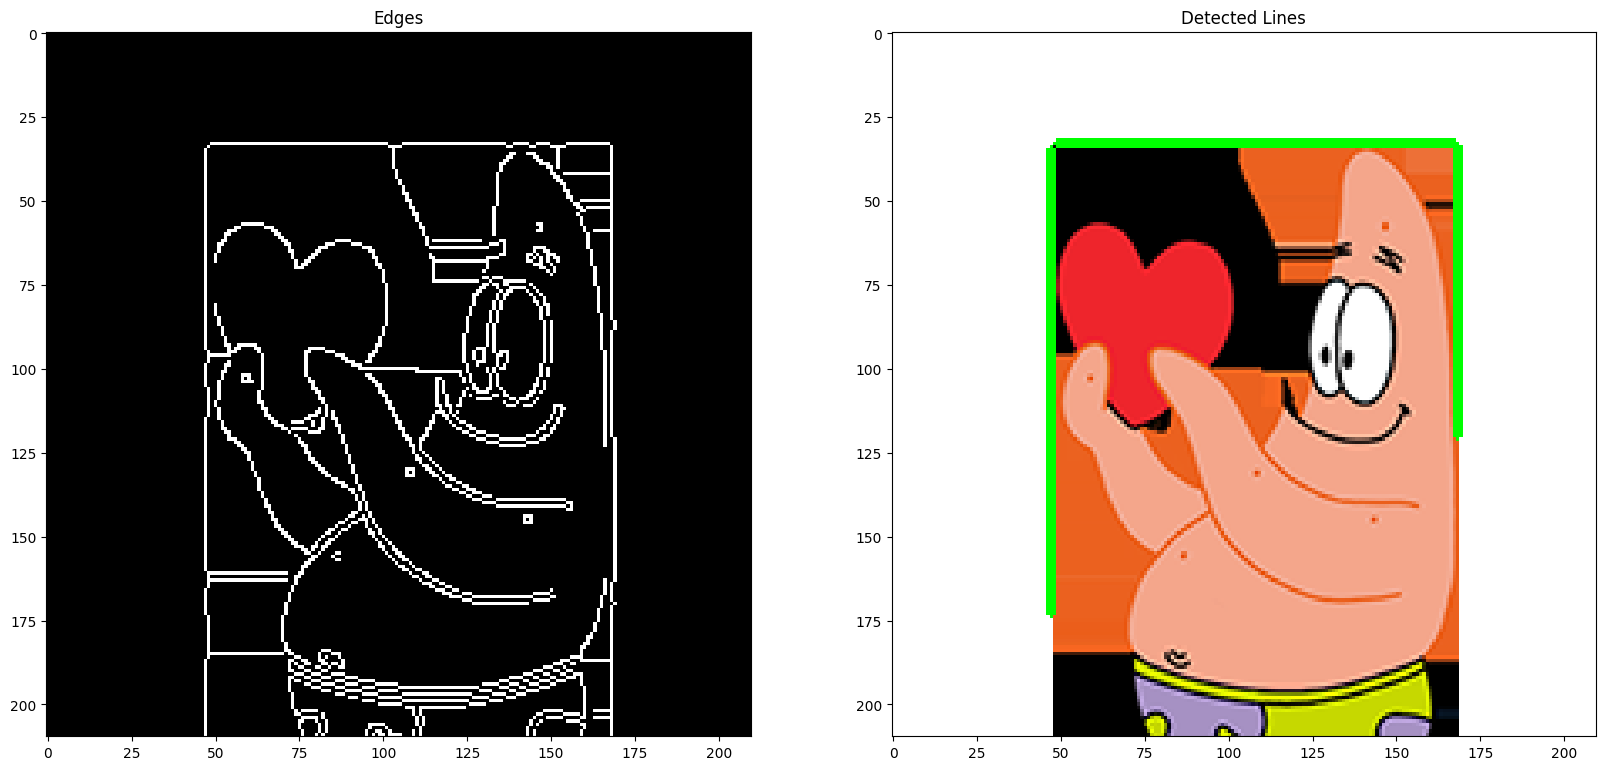

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(str(ddung_path))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Canny Edge Detection
edges = cv2.Canny(gray_image, 20, 150)

# Hough Transform을 활용한 선 검출
lines = cv2.HoughLinesP(
    edges,
    1,
    np.pi/180,
    threshold=100,
    minLineLength=50,
    maxLineGap=10
)
# `rho`: 거리 간격의 해상도 (1 픽셀).
# `theta`: 각도 간격의 해상도 (1도 = np.pi/180).
# `threshold`: 선으로 간주하기 위한 최소 누적값.
# `minLineLength`: 선으로 간주하기 위한 최소 길이.
# `maxLineGap`: 두 점 사이의 최대 간격(이 값보다 크면 다른 선으로 간

# 선 그리기
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 결과 시각화
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.title("Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


Original shape (RGB): (210, 210, 4)
Grayscale shape: (210, 210)
CMYK shape: (210, 210, 4)
HSV shape: (210, 210, 3)


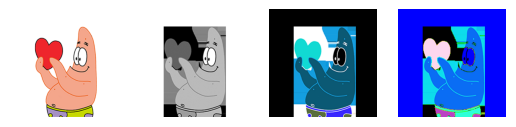

In [28]:
# @title 색상공간 변환


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image = Image.open(ddung_path)

# 색상 공간 분석
image_array = np.array(image)
print("Original shape (RGB):", image_array.shape)
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(image_array)

# RGB에서 Grayscale로 변환
gray_image = image.convert("L")
gray_array = np.array(gray_image)
print("Grayscale shape:", gray_array.shape)
plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(gray_array, cmap='gray')

cmyk_image = image.convert("CMYK")
cmky_array = np.array(cmyk_image)
print("CMYK shape:", cmky_array.shape)
plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(cmky_array[:,:,:3])


hsv_image = image.convert("HSV")
hsv_array = np.array(hsv_image)
print("HSV shape:", hsv_array.shape)
plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(hsv_array)

# YCbCr

plt.show()


히스토그램 평활화 완료


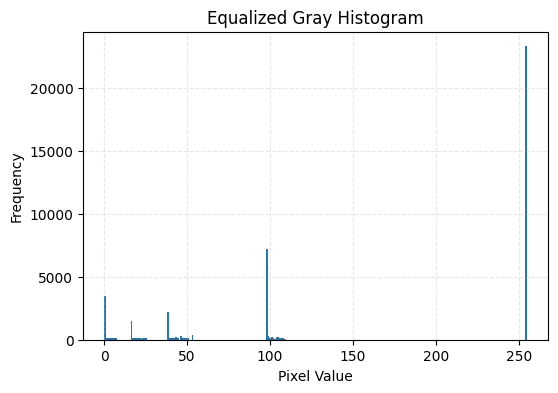

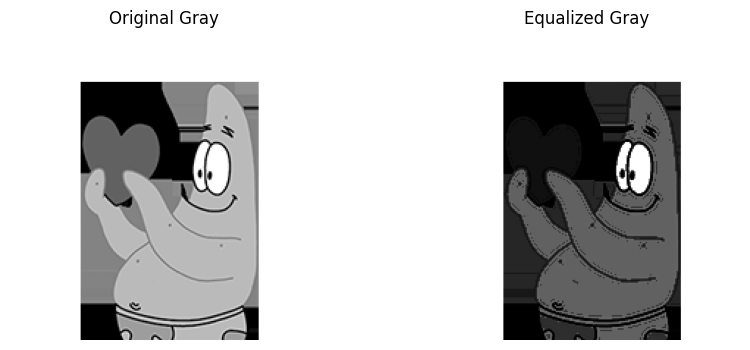

CLAHE 적용 완료


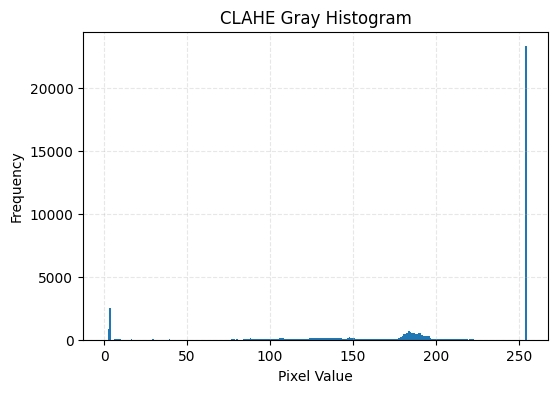

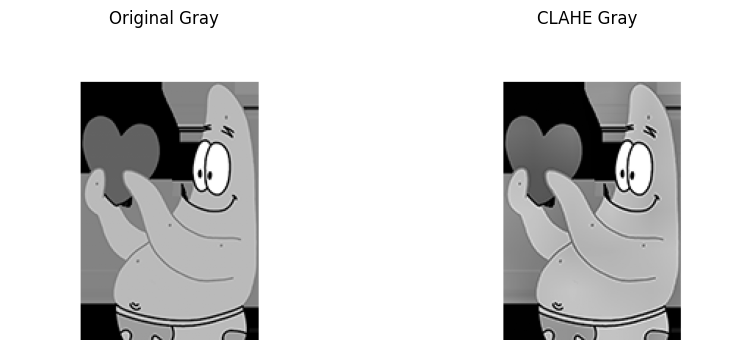

RGB 이미지가 아님


In [29]:
# @title 히스토그램 처리


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

# 그레이 히스토그램
def plot_histogram_gray(gray, title="Gray Histogram"):
    if gray is None:
        return
    plt.figure(figsize=(6,4))
    plt.hist(gray.ravel(), bins=256, range=(0,255))
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

# RGB 히스토그램
def plot_histogram_rgb(arr, title="RGB Histogram"):
    if arr is None or arr.ndim != 3 or arr.shape[2] != 3:
        print("RGB 이미지가 아님")
        return
    plt.figure(figsize=(6,4))
    colors = ['r', 'g', 'b']
    for i, col in enumerate(colors):
        plt.hist(arr[..., i].ravel(), bins=256, range=(0,255), alpha=0.5, color=col, label=f"{col.upper()} channel")
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

# 히스토그램 평활화
def equalize_histogram_gray(gray):
    if gray is None or gray.ndim != 2:
        print("그레이스케일 이미지 필요함")
        return None
    eq = cv2.equalizeHist(gray)
    print("히스토그램 평활화 완료")
    return eq

# CLAHE 적용 (Contrast Limited Adaptive Histogram Equalization)
def clahe_histogram_gray(gray, clipLimit=2.0, tileGridSize=(8,8)):
    if gray is None or gray.ndim != 2:
        print("그레이스케일 이미지 필요함")
        return None
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    cl = clahe.apply(gray)
    print("CLAHE 적용 완료")
    return cl

# 원본 RGB 로드
img_rgb = Image.open(ddung_path)

# 그레이스케일 변환
gray = np.array(img_rgb.convert('L'))

# # 원본 히스토그램 시각화
# plot_histogram_gray(gray, title="Original Gray Histogram")

# 히스토그램 평활화 및 비교 시각화
eq = equalize_histogram_gray(gray)
if eq is not None:
    plot_histogram_gray(eq, title="Equalized Gray Histogram")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Gray")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(eq, cmap='gray')
    plt.title("Equalized Gray")
    plt.axis('off')
    plt.show()

# CLAHE 적용 및 비교 시각화
cl = clahe_histogram_gray(gray, clipLimit=2.0, tileGridSize=(8,8))
if cl is not None:
    plot_histogram_gray(cl, title="CLAHE Gray Histogram")
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Gray")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(cl, cmap='gray')
    plt.title("CLAHE Gray")
    plt.axis('off')
    plt.show()

# RGB 히스토그램 시각화
img_rgb = np.array(img_rgb)
plot_histogram_rgb(img_rgb, title="Original RGB Histogram")


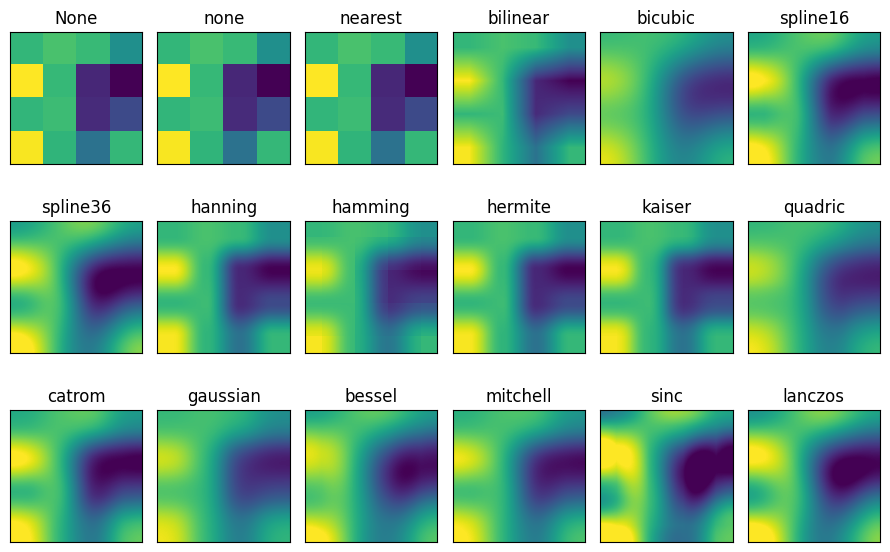

In [6]:
# @title Interpolation 기법


import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)

grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

libpng warning: iCCP: known incorrect sRGB profile


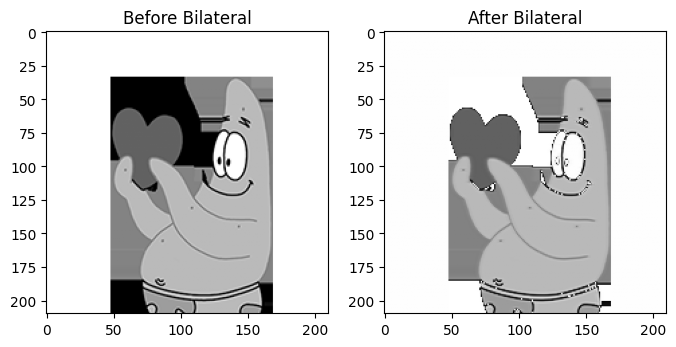

In [30]:
# @title 노이즈제거 - Bilateral denoise
# 가우시안 필터와 경계 필터를 결합

def bilateral_denoise_images(images, d=7, sigmaColor=40, sigmaSpace=50):
    denoised_images = []
    for img in images:
        denoised = cv2.bilateralFilter((img * 255).astype(np.uint8), d, sigmaColor, sigmaSpace)
        denoised = 255-denoised
        denoised_images.append(denoised)

    return np.array(denoised_images) # numpy의 array로 변환

img = cv2.imread(str(ddung_path))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

train_images_bilateral = bilateral_denoise_images(gray)

# 샘플 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Before Bilateral")

axes[1].imshow(train_images_bilateral, cmap='gray')
axes[1].set_title("After Bilateral")

plt.show()